In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind

import wrangle as w
import explore as e

# Exercises:

# 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

# 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
df = w.wrangle_zillow()

csv file found and read


In [3]:
train, validate, test = w.split_function(df)

Prepared df: (2033172, 9)

Train: (1219902, 9)
Validate: (406635, 9)
Test: (406635, 9)


In [4]:
train.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,county,county_Orange,county_Ventura
789918,2,1,777,350556,1946,4230,LA,0,0
1696225,2,1,1014,192599,1938,2567,LA,0,0
1720742,3,2,1762,480000,1958,5566,Orange,1,0
962447,1,1,616,131512,1952,1694,LA,0,0
324076,3,2,1495,84031,1954,1064,LA,0,0


# 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.


- Since my target variable, tax_value, is continuous; this is a regression problem
- Multiple linear regression analysis makes several key assumptions:
    - There must be a linear relationship between the outcome variable and the independent variables 
        - (scatterplots can show whether there is a linear or curvilinear relationship)
    - No Multicollinearity -- Multiple regression assumes that the independent variables are not highly correlated with each other
    - Multivariate Normality -- Multiple regression assumes that the residuals are normally distributed

### Previous univariate exploration showed generally normal distributions for the continuous independent variables, so I think multivariate normality is met.

### So next up is to do some initial visualization (as requested in #3) to see what relationships exist between the features and the target AND what relationships exist between the features

In [5]:
# set columns to visualize (drop the categorical columns and put target at end)
cols = ['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'tax_amount', 'tax_value']

In [18]:
# make corr with default value (method=pearson) due to normal distribution of our variables
# NOTE: Misty said spearman is better for discrete variables, like say bedrooms and bathrooms
zillow_corr = train[cols].corr()
zillow_corr

,bedrooms,bathrooms,square_feet,year_built,tax_amount,tax_value
bedrooms,1.000000,0.615199,0.618291,0.372353,0.264441,0.262850
bathrooms,0.615199,1.000000,0.774550,0.477473,0.439099,0.431257
square_feet,0.618291,0.774550,1.000000,0.466103,0.521039,0.523699
year_built,0.372353,0.477473,0.466103,1.000000,0.295686,0.286946
tax_amount,0.264441,0.439099,0.521039,0.295686,1.000000,0.964854
tax_value,0.262850,0.431257,0.523699,0.286946,0.964854,1.000000


- tax_amount is most highly correlated with target, tax_value
- square_feet is the next most highly correlated with tax_value

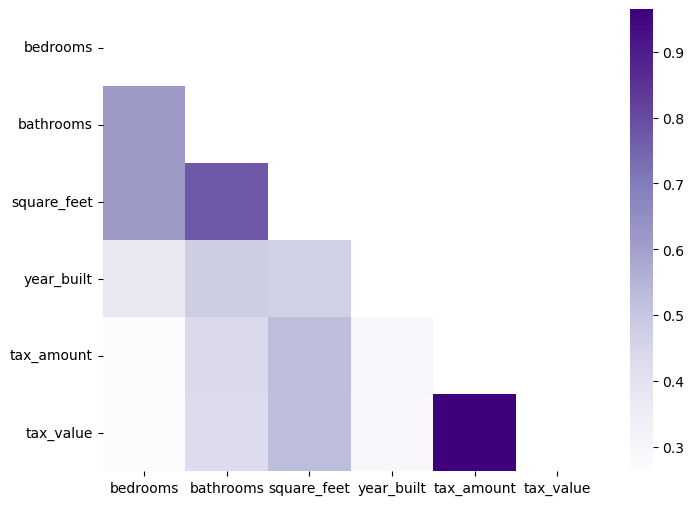

In [19]:
# Next, pass correlation matrix to sns.heatmap
plt.figure(figsize=(8,6))
sns.heatmap(zillow_corr, cmap='Purples', mask=np.triu(zillow_corr))
plt.show()

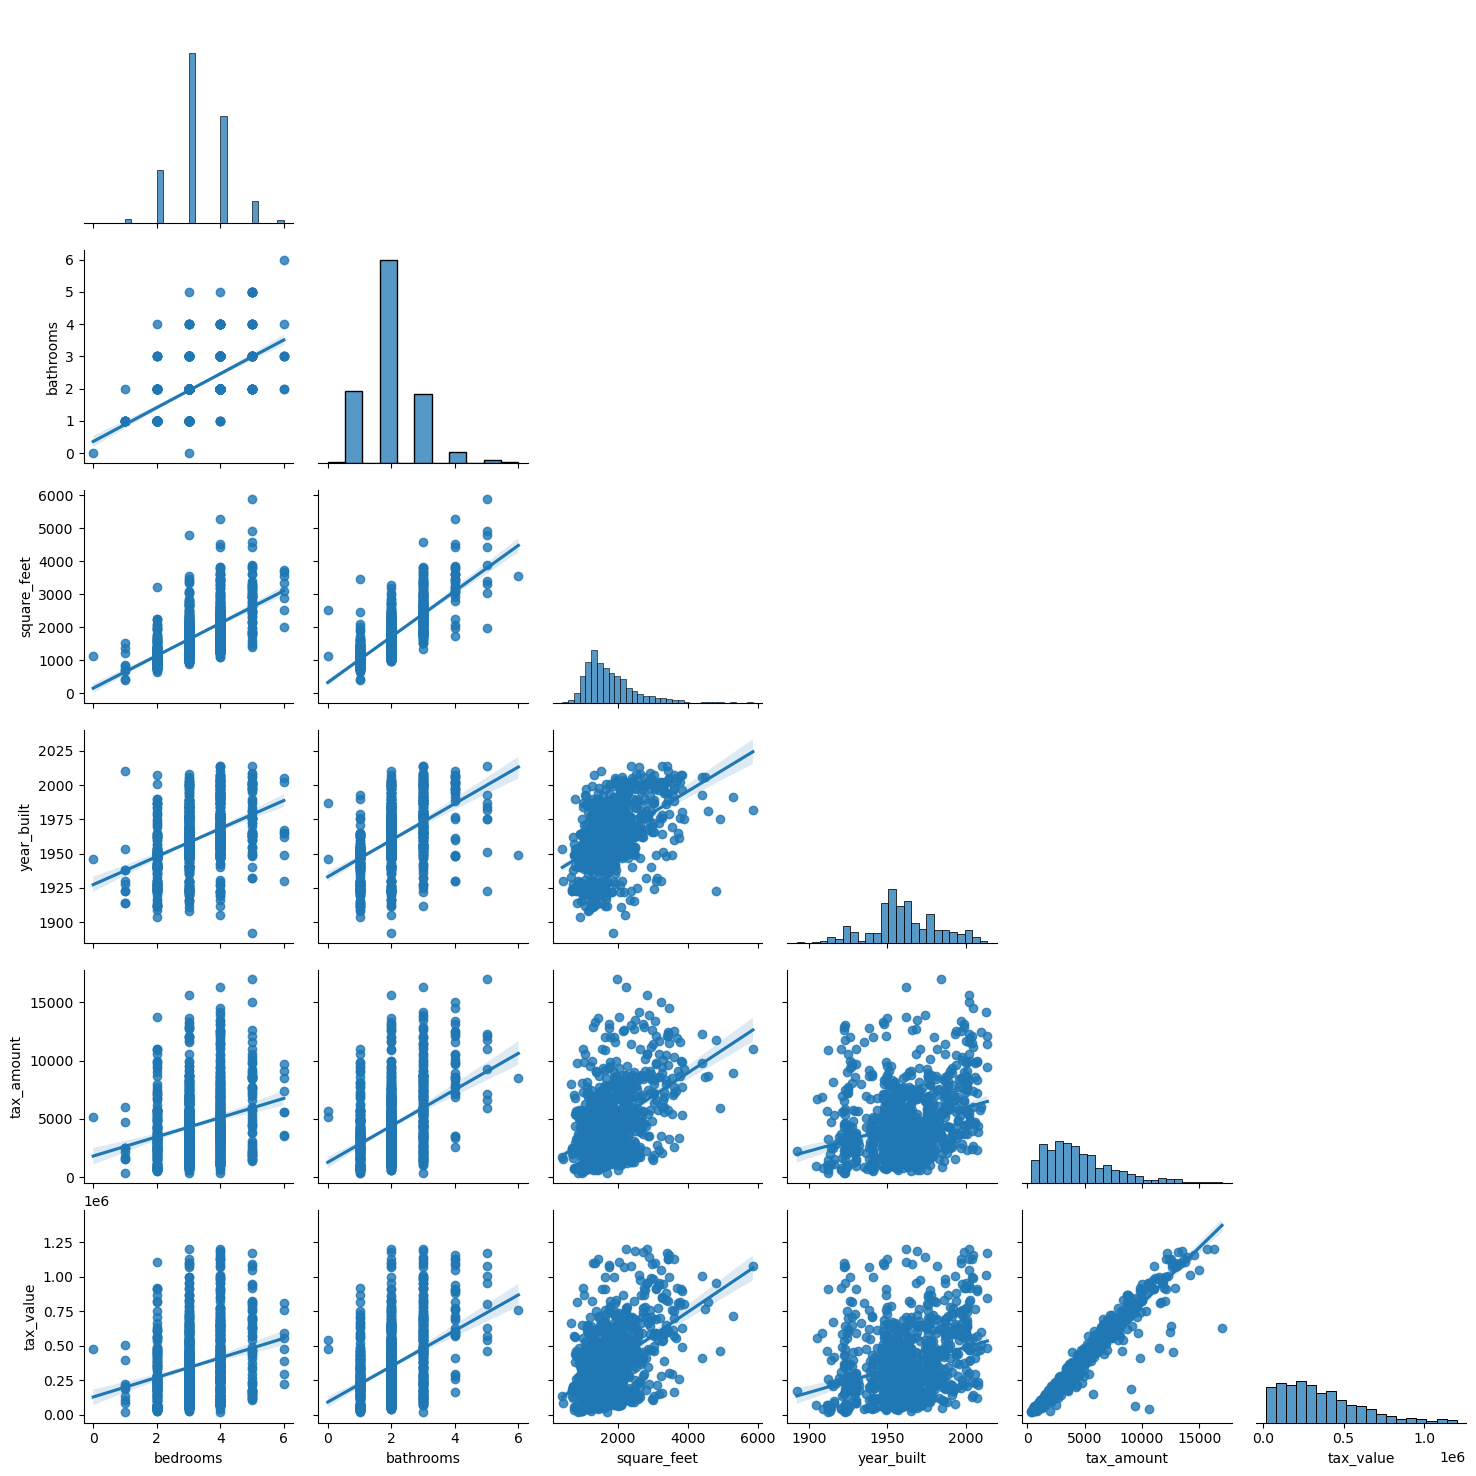

In [48]:
# if i want hue='county', i have to add county back into my cols
sns.pairplot(data=train[cols].sample(1000), kind='reg', corner=True)
plt.show()

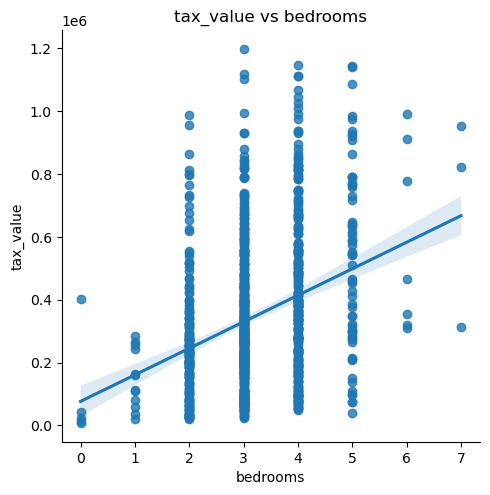

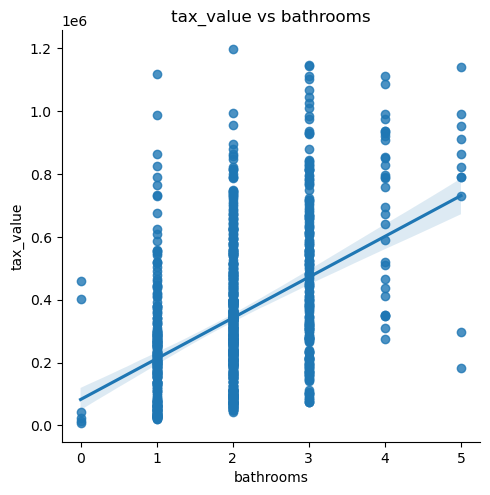

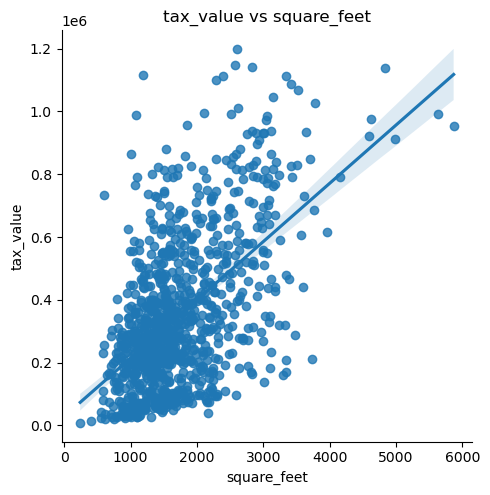

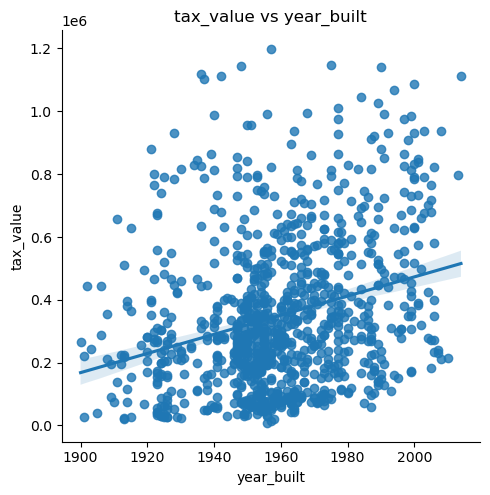

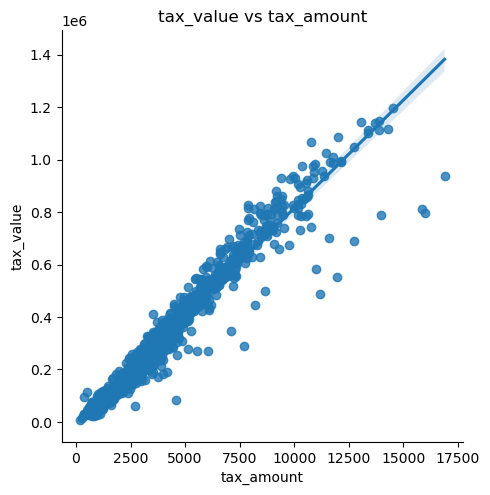

In [14]:
e.plot_variable_pairs(train)

# 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

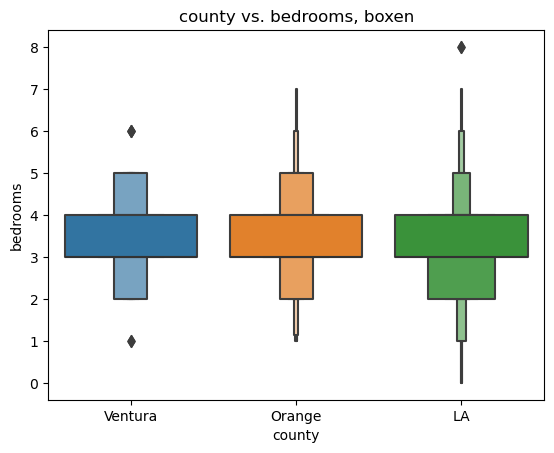

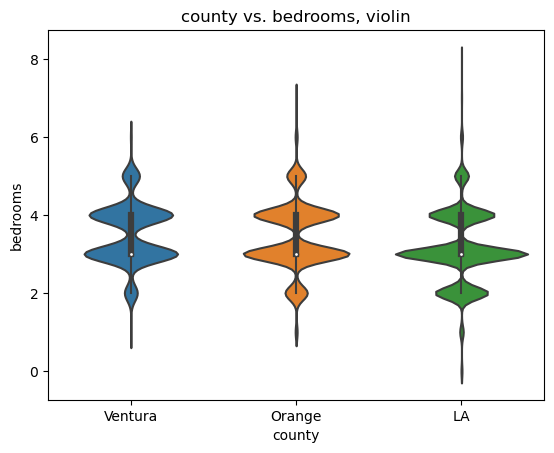

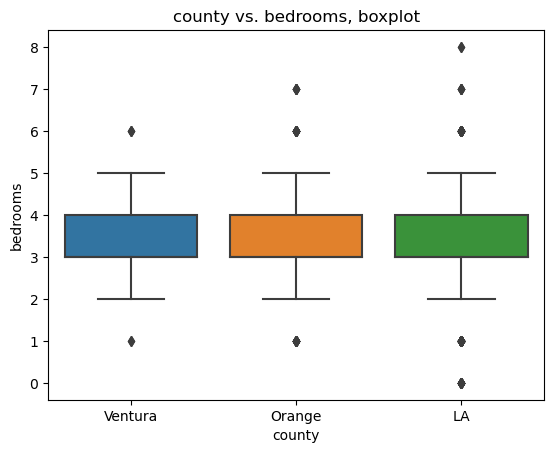

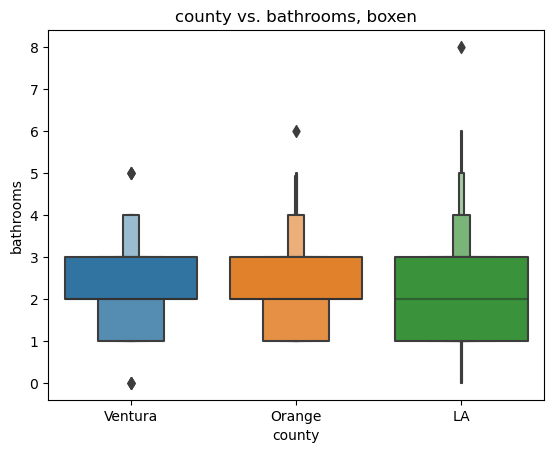

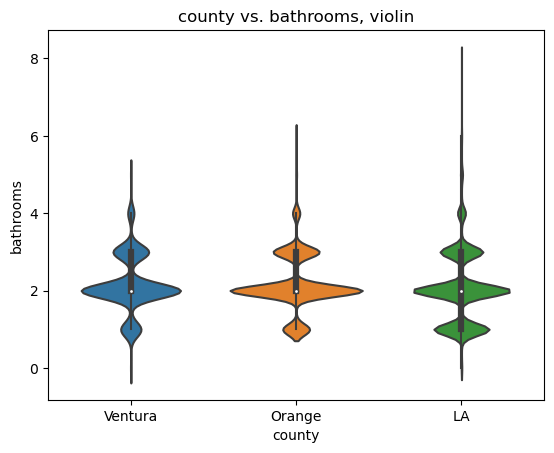

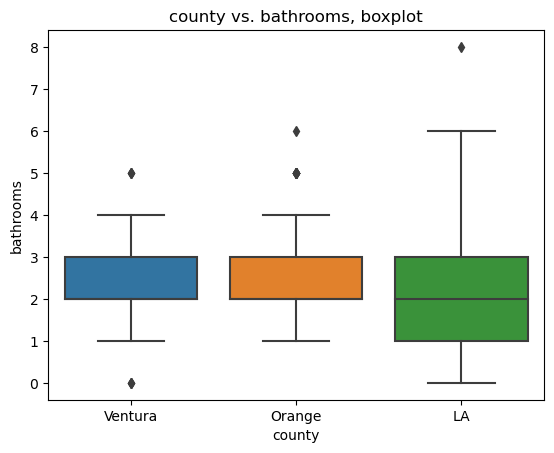

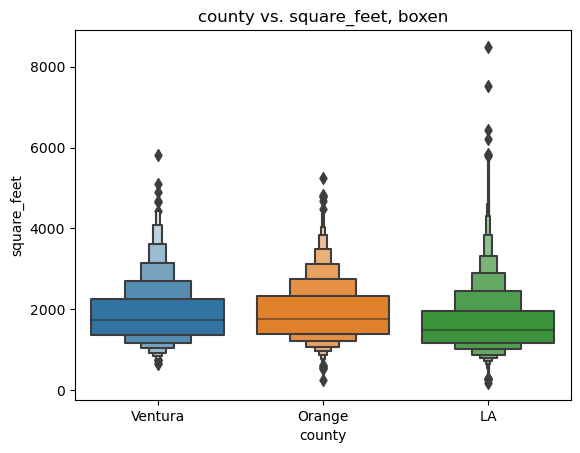

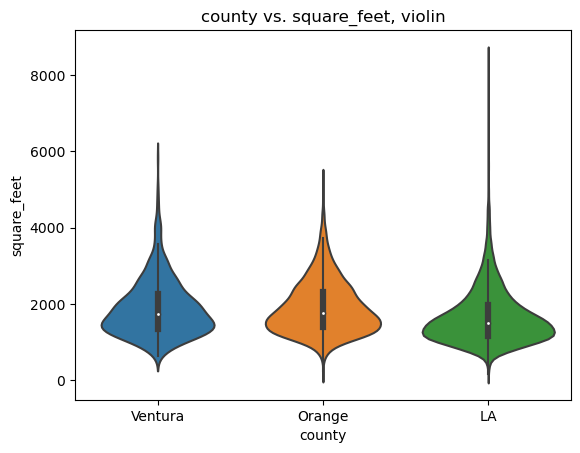

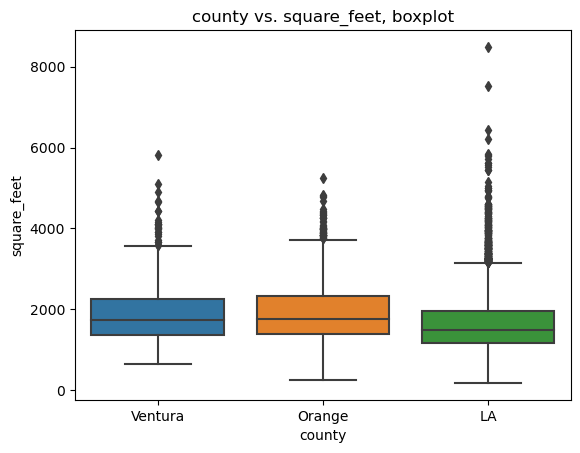

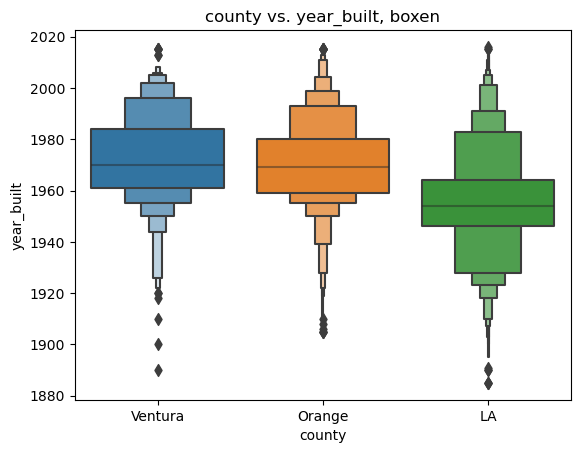

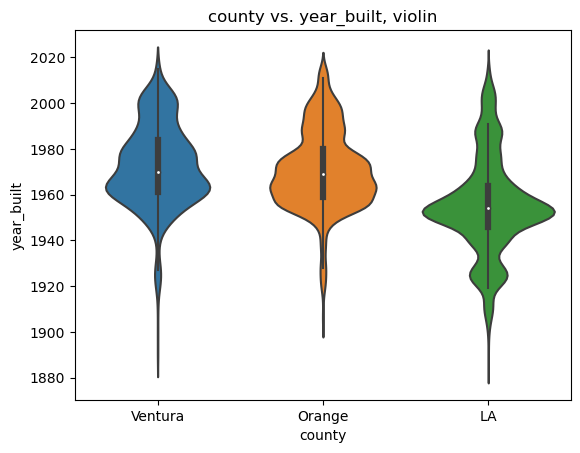

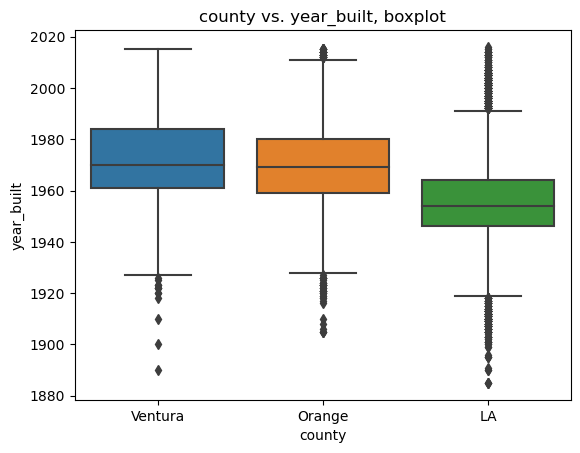

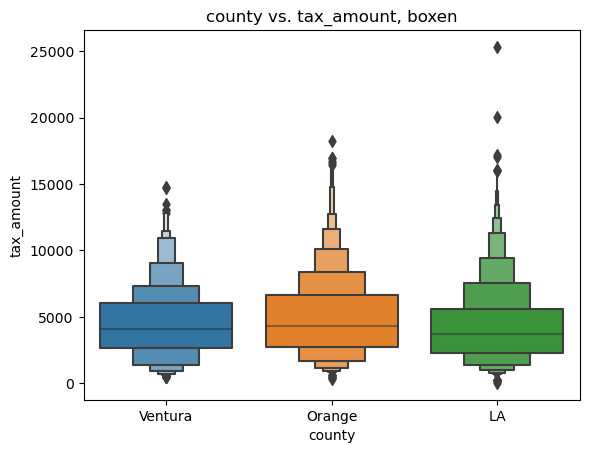

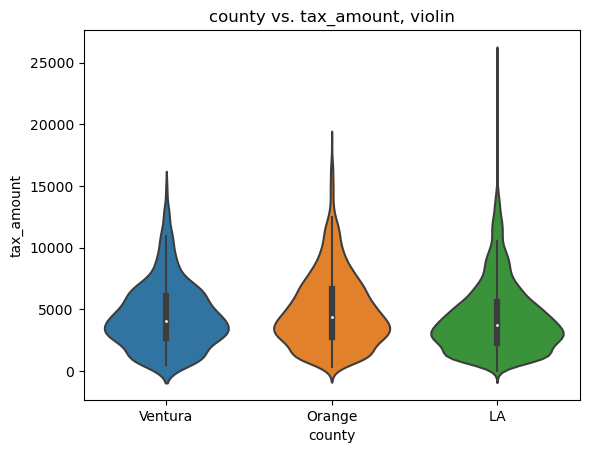

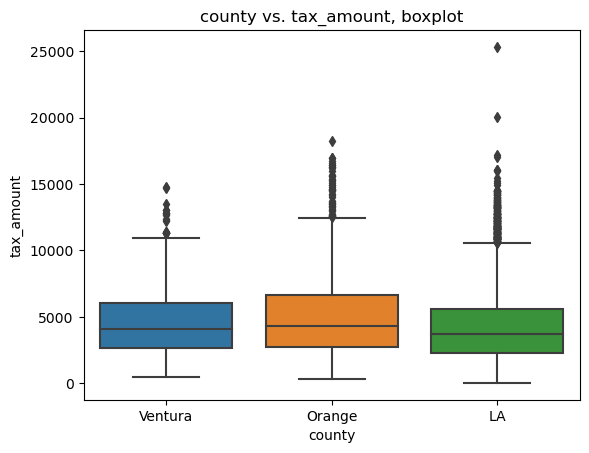

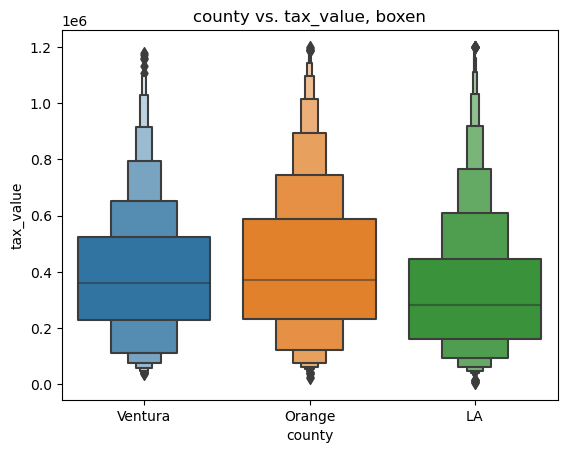

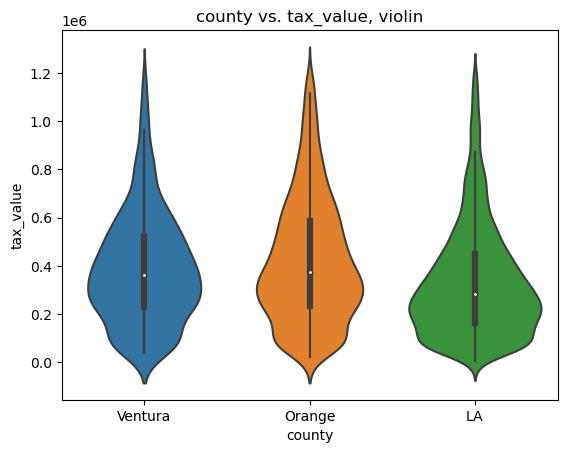

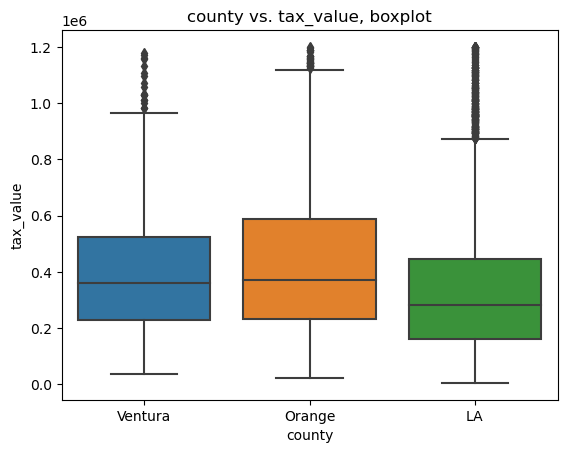

In [26]:
cols_contin = ['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'tax_amount', 'tax_value']
cols_cat = ['county']
e.plot_categorical_and_continuous_vars(train, cols_contin, cols_cat)

# 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.
- Done

# 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.
- Done

# 7. Come up with some initial hypotheses based on your goal of predicting property value.
- Below

# 8. Visualize all combinations of variables in some way.
- Done with pairplot and .corr/heatmap, see above

# 9. Run the appropriate statistical tests where needed.
- Below

In [20]:
zillow_corr

,bedrooms,bathrooms,square_feet,year_built,tax_amount,tax_value
bedrooms,1.000000,0.615199,0.618291,0.372353,0.264441,0.262850
bathrooms,0.615199,1.000000,0.774550,0.477473,0.439099,0.431257
square_feet,0.618291,0.774550,1.000000,0.466103,0.521039,0.523699
year_built,0.372353,0.477473,0.466103,1.000000,0.295686,0.286946
tax_amount,0.264441,0.439099,0.521039,0.295686,1.000000,0.964854
tax_value,0.262850,0.431257,0.523699,0.286946,0.964854,1.000000


## Initial hypotheses:
### - Reference correlation coefficients
#### - Obvious: tax_amount is highly correlated with tax_value; will not test.
#### - target hypotheses: square_feet and bathrooms are correlated with tax_value
#### - target hypotheses: bedrooms and year_built are not strongly correlated with tax_value
#### - feature hypotheses: bedrooms, bathrooms, square_feet are correlated with each other
#### - feature hypotheses: year_built is not strongly correlated with anything

#### - feature: county has a low correlation if any to any other variable

## Analyze square_feet vs tax_value with stats
- $H_0$: There is NO relationship between square_feet and tax_value
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize pearsonr - we are comparing continuous variables, normally distributed

In [27]:
r, p = pearsonr(train.square_feet, train.tax_value)
r, p

(0.5236987670520964, 0.0)

- p is < $\alpha$, therefore we reject the null hypothesis which suggests there is a relationship between square_feet and tax_value

## Analyze bathrooms vs tax_value with stats
- $H_0$: There is NO relationship between bathrooms and tax_value
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize pearsonr - we are comparing continuous variables, normally distributed

In [22]:
r, p = pearsonr(train.bathrooms, train.tax_value)
r, p

(0.43125723828063045, 0.0)

- p is < $\alpha$, therefore we reject the null hypothesis which suggests there is a relationship between bathrooms and tax_value

## Analyze bedrooms vs tax_value with stats
- $H_0$: There is NO relationship between bedrooms and tax_value
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize pearsonr - we are comparing continuous variables, normally distributed

In [28]:
r, p = pearsonr(train.bedrooms, train.tax_value)
r, p

(0.26284955369271346, 0.0)

- Interesting. p is < $\alpha$, therefore we reject the null hypothesis which suggests there is a relationship between bedrooms and tax_value (albeit a weak one)

## Analyze year_built vs tax_value with stats
- $H_0$: There is NO relationship between year_built and tax_value
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize pearsonr - we are comparing continuous variables, normally distributed

In [24]:
r, p = pearsonr(train.year_built, train.tax_value)
r, p

(0.2869464605231169, 0.0)

- Interesting. p is < $\alpha$, therefore we reject the null hypothesis which suggests there is a relationship between year_built and tax_value (albeit a weak one)

#### Given these stats tests above, I will not test bedrooms vs bathrooms vs square_feet.  All had correlation coefficients >= .6 which means they will have p < $\alpha$.

#### I will also not test year_built next to anything. I've already tested it next to tax_value (corr == .287). Every other correlation coefficient, where year_built was compared to something, was greater than .287, so I expect p < $\alpha$ when comparing year_built to any other feature

In [ ]:
# what about county and tax_value

## Analyze county vs tax_value with stats
- $H_0$: There is NO relationship between county and tax_value
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize f_oneway (ANOVA) - we are comparing a categorical variable with more than 2 categories to a continuous variable, normally distributed

In [36]:
LA = train[train.county=='LA'].tax_value
Orange = train[train.county=='Orange'].tax_value
Ventura = train[train.county=='Ventura'].tax_value
stat, p = f_oneway(LA, Orange, Ventura)
stat, p

(16869.49162979778, 0.0)

- p is < $\alpha$, therefore we reject the null hypothesis which suggests there is a relationship between county and tax_value

## Analyze county vs everything with stats
- $H_0$: There is NO relationship between anything and tax_value
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize f_oneway (ANOVA) - we are comparing a categorical variable with more than 2 categories to a continuous variable, normally distributed

In [41]:
results = []
for col in cols:
    LA = train[train.county=='LA'][col]
    Orange = train[train.county=='Orange'][col]
    Ventura = train[train.county=='Ventura'][col]
    stat, p = f_oneway(LA, Orange, Ventura)
    results.append([col, stat, p])
results_df = pd.DataFrame(results, columns=['feature', 'stat', 'p_value'])
results_df

,feature,stat,p_value
0,bedrooms,19071.870549,0.0
1,bathrooms,4202.411259,0.0
2,square_feet,18705.749651,0.0
3,year_built,94534.677853,0.0
4,tax_amount,5791.651184,0.0
5,tax_value,16869.491630,0.0


- p is < $\alpha$, therefore we reject the null hypothesis which suggests there is a relationship between county and each feature

In [43]:
# It looks like Orange and Ventura counties had much less correlation, so I wanted to check that.
# Since there are only two samples, I transitioned to a two_sample t-test, aka ttest_ind
results = []
for col in cols:
    Orange = train[train.county=='Orange'][col]
    Ventura = train[train.county=='Ventura'][col]
    stat, p = ttest_ind(Orange, Ventura)
    results.append([col, stat, p])
results_df = pd.DataFrame(results, columns=['feature', 'stat', 'p_value'])
results_df

,feature,stat,p_value
0,bedrooms,-28.659735,1.836296e-180
1,bathrooms,-0.018174,9.855004e-01
2,square_feet,-1.515144,1.297367e-01
3,year_built,-40.658889,0.000000e+00
4,tax_amount,39.244262,0.000000e+00
5,tax_value,31.902483,4.663135e-223


In [ ]:
# AND lo and behold, bathrooms and square_feet are the only ones that had a pvalue > .05 (can't reject H_0)
# the other variables do have p values well under .05 (can reject H_0)

# Summarize statistics analysis
- basically every variable is correlated with every other variable with positive correlation coefficients ranging from .287 to .96 for the continuous variables


- features that are highly correlated to tax_value
    - tax_amount
- features that are medium correlated to tax_value
    - square_feet and bathrooms
- features that have a low correlation to tax_value
    - year_built and bedrooms
   
   
- features that have a medium correlation to each other:
    - bedrooms, bathrooms, square_feet
- feature that has a low correlation to other features
    - year_built
    

- county also is correlated with every other feature as well as our target

# 10. What independent variables are correlated with the dependent variable, home value?
- See above

# 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?
- See above

# 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.
- Done

# 13. Explore your dataset with any other visualizations you think will be helpful.

# I'm going to look at the half_bath compared to tax_value (thank you Keila)

In [2]:
df = w.wrangle_zillow()

csv file found and read


In [4]:
train, validate, test = w.split_function(df)

Prepared df: (2033172, 9)

Train: (1219902, 9)
Validate: (406635, 9)
Test: (406635, 9)


In [5]:
train.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount,county,tax_value,county_Orange,county_Ventura
789918,2,1.0,777,1946,4230,LA,350556,0,0
1696225,2,1.0,1014,1938,2567,LA,192599,0,0
1720742,3,2.0,1762,1958,5566,Orange,480000,1,0
962447,1,1.0,616,1952,1694,LA,131512,0,0
324076,3,2.0,1495,1954,1064,LA,84031,0,0


In [7]:
train[train.bathrooms == 1.75]

,bedrooms,bathrooms,square_feet,year_built,tax_amount,county,tax_value,county_Orange,county_Ventura
1096295,3,1.75,1120,1957,6550,Orange,532061,1,0


In [8]:
train.shape

(1219902, 9)

In [18]:
if round(k) > int(k):
    print("this has a half bath")
else:
    print(" no half bath")

this has a half bath


In [20]:
train.bathrooms.astype(int)

789918     1
1696225    1
1720742    2
962447     1
324076     2
          ..
93265      2
1599075    3
1144091    1
233915     3
1609704    2
Name: bathrooms, Length: 1219902, dtype: int64

In [22]:
train['has_half_bath'] = (train.bathrooms.round() > train.bathrooms.astype(int))

In [23]:
train.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount,county,tax_value,county_Orange,county_Ventura,has_half_bath
789918,2,1.0,777,1946,4230,LA,350556,0,0,False
1696225,2,1.0,1014,1938,2567,LA,192599,0,0,False
1720742,3,2.0,1762,1958,5566,Orange,480000,1,0,False
962447,1,1.0,616,1952,1694,LA,131512,0,0,False
324076,3,2.0,1495,1954,1064,LA,84031,0,0,False


In [26]:
train.has_half_bath = train.has_half_bath.astype(int)

In [27]:
train.head()

,bedrooms,bathrooms,square_feet,year_built,tax_amount,county,tax_value,county_Orange,county_Ventura,has_half_bath
789918,2,1.0,777,1946,4230,LA,350556,0,0,0
1696225,2,1.0,1014,1938,2567,LA,192599,0,0,0
1720742,3,2.0,1762,1958,5566,Orange,480000,1,0,0
962447,1,1.0,616,1952,1694,LA,131512,0,0,0
324076,3,2.0,1495,1954,1064,LA,84031,0,0,0


(array([1186967.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   32935.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

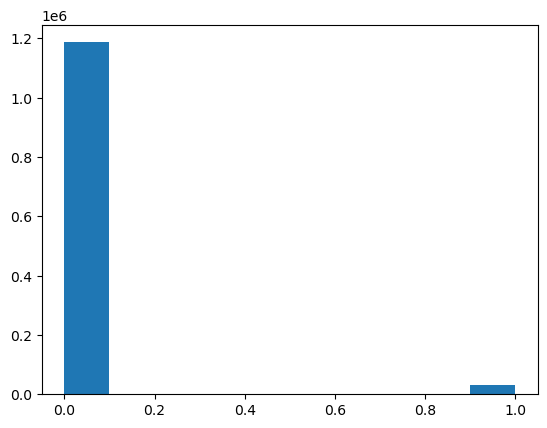

In [28]:
plt.hist(train.has_half_bath)